In [1]:
import pandas as pd

In [4]:
fpath = '/Users/jungwon/Documents/학교/포트폴리오/data/subway_raw.xlsx'
raw = pd.read_excel(fpath)

In [5]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,금,중앙선,1220,지평,38,49,20190304
1,20190301,금,중앙선,1219,용문,2804,3073,20190304
2,20190301,금,중앙선,1218,원덕,439,479,20190304
3,20190301,금,중앙선,1217,양평,2984,3291,20190304
4,20190301,금,중앙선,1216,오빈,311,338,20190304


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## 승객이 많이 타는 역은?

In [9]:
#역명별 승객수 데이터를 살펴보기

data_station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc='sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending = False)
data_station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


## 노선별로 역별/요일별 승객수를 비교

In [11]:
raw['노선명'].unique()

array(['중앙선', '장항선', '일산선', '우이신설선', '안산선', '수인선', '분당선', '1호선', '2호선',
       '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '9호선2~3단계', '경강선',
       '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선'], dtype=object)

In [16]:
#하나의 노선(1호선) 데이터를 선택하여 역별/요일별 승객수 데이터를 정리
line = '1호선'
data_line = raw[raw['노선명']==line]
data_line

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
85,20190301,금,1호선,150,서울역,62588,64794,20190304
86,20190301,금,1호선,151,시청,34884,36956,20190304
87,20190301,금,1호선,152,종각,50459,37374,20190304
88,20190301,금,1호선,153,종로3가,42034,38116,20190304
89,20190301,금,1호선,154,종로5가,33728,34581,20190304
...,...,...,...,...,...,...,...,...
98756,20190630,일,1호선,153,종로3가,21783,19608,20190703
98757,20190630,일,1호선,152,종각,20934,18186,20190703
98758,20190630,일,1호선,151,시청,12868,12310,20190703
98759,20190630,일,1호선,150,서울역,41122,37706,20190703


In [24]:
df_pivot = data_line.pivot_table(index=['역ID','역명'], columns = '요일', values='승차총승객수', aggfunc='sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
df_pivot = df_pivot / 10000
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [25]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할때 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용하시면 됩니다. 
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정하고, 필요한 라이브러리를 불러들이는 코드입니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False 

In [39]:
line

'1호선'

<AxesSubplot:title={'center':'1호선 역/요일별 승객 수'}, xlabel='요일', ylabel='역ID-역명'>

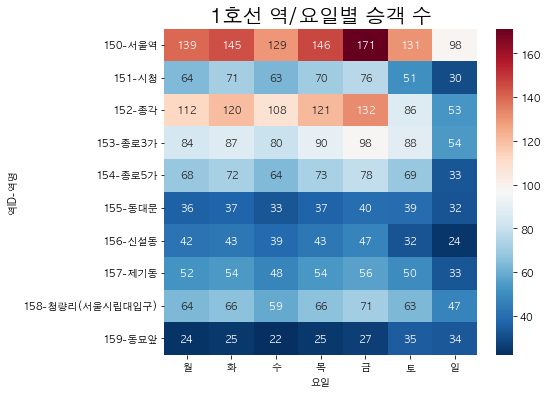

In [40]:
#앞서 정리한 1호선의 역별/요일별 승객수를 히트맵을 이용해 표현

fig, ax = plt.subplots(figsize = (7,6))
plt.title(f'{line} 역/요일별 승객 수', fontsize = 20)
sns.heatmap(df_pivot, cmap = 'RdBu_r',
            annot = True, fmt = '.0f')

In [48]:
# 1호선 ~ 9호선 노선 리스트 정리
line_seoul_list = []
for line in raw['노선명'].unique():
    #마지막 두 자리가 '호선'인 것
    if line[1:] == '호선':
        print(line)
        line_seoul_list.append(line)

1호선
2호선
3호선
4호선
5호선
6호선
7호선
8호선
9호선


In [49]:
line_seoul_list

['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

1호선
2호선
3호선
4호선
5호선
6호선
7호선
8호선
9호선


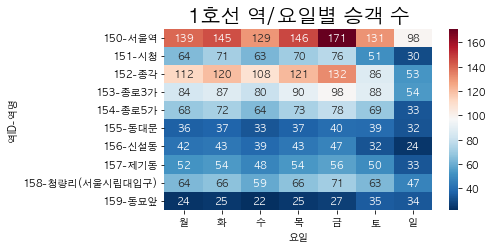

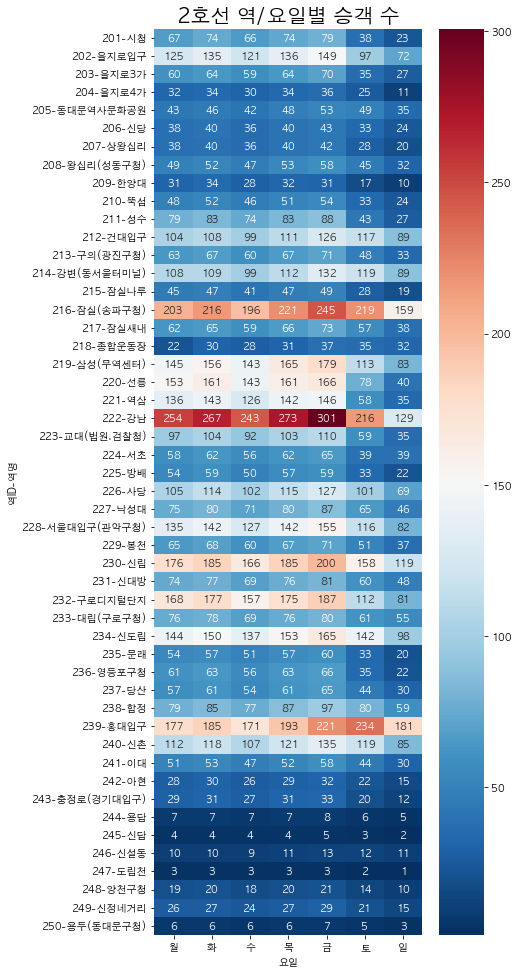

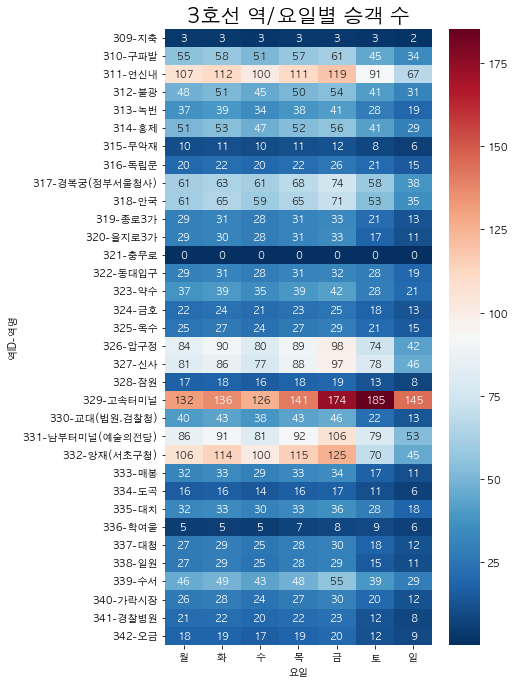

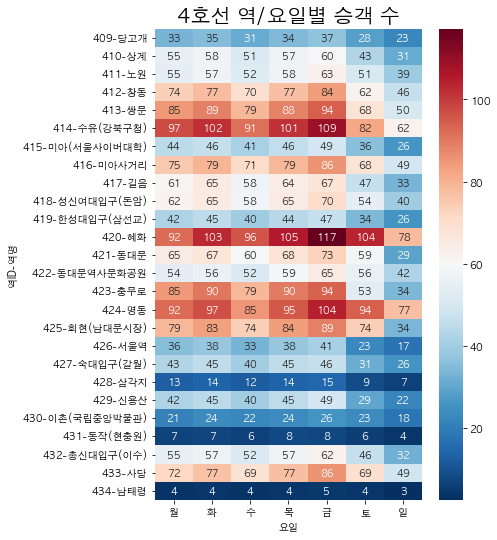

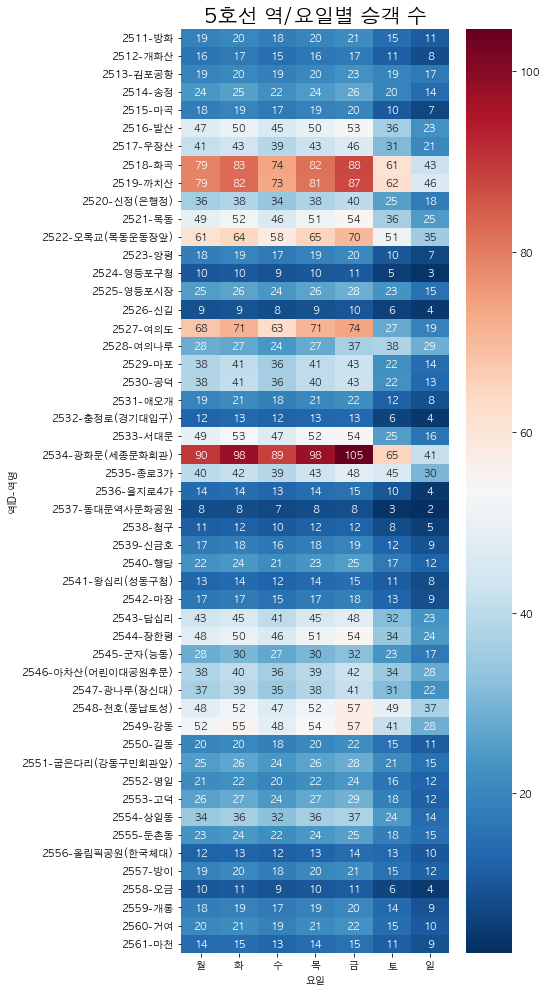

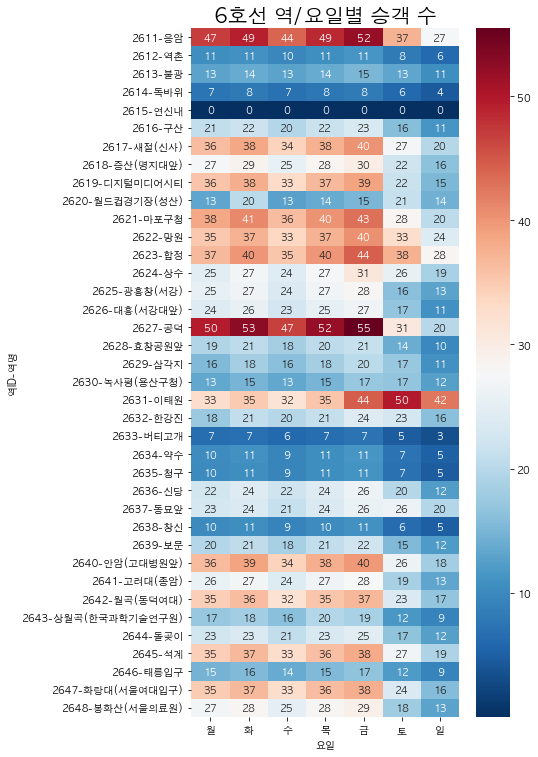

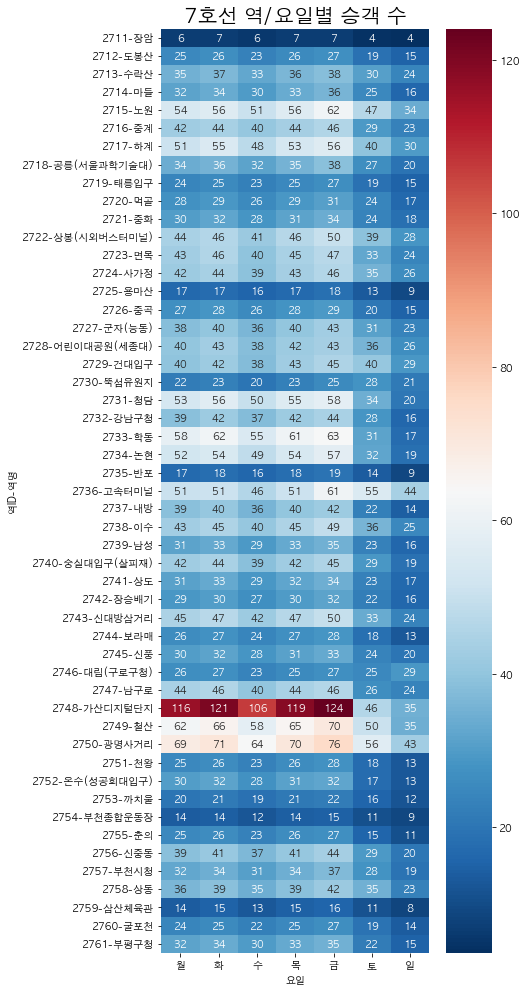

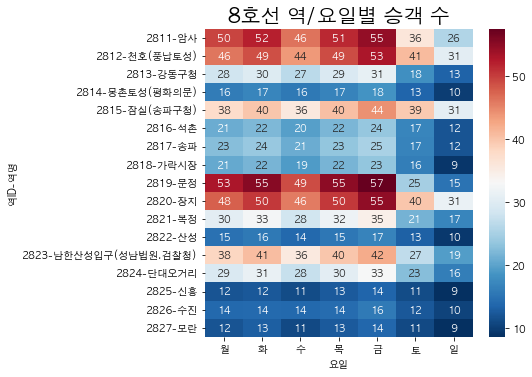

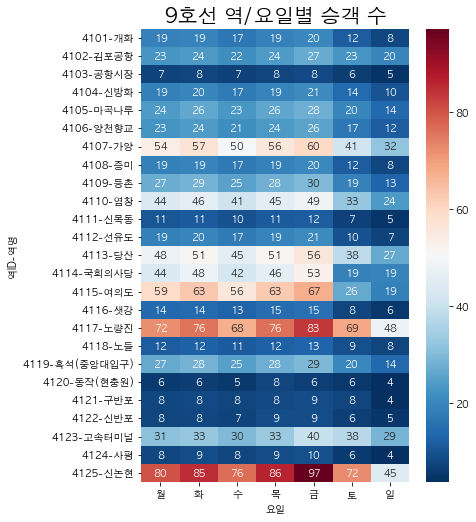

In [54]:
for line in line_seoul_list:
    print(line)
    
    data_line = raw[raw['노선명']==line]
    df_pivot = data_line.pivot_table(index=['역ID','역명'], columns = '요일', values='승차총승객수', aggfunc='sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot / 10000
    
    fig, ax = plt.subplots(figsize = (6, len(df_pivot)/3))
    plt.title(f'{line} 역/요일별 승객 수', fontsize = 20)
    sns.heatmap(df_pivot, cmap = 'RdBu_r',
                annot = True, fmt = '.0f')